In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, gamma, norm
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
hotel_booking_source_df = pd.read_csv("hotel_bookings.csv")
hotel_booking_source_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_booking_source_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel_booking_source_df['date'] = pd.to_datetime(hotel_booking_source_df['arrival_date_year'].astype(str) + '-' + hotel_booking_source_df['arrival_date_month'] + '-' + hotel_booking_source_df['arrival_date_day_of_month'].astype(str))
hotel_booking_source_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [ ]:
hotel_analysis_df = hotel_booking_source_df[(hotel_booking_source_df['is_canceled'] == 0) & (hotel_booking_source_df['reservation_status'] !='No-Show')]

Assumption
- Ignore the length of stay by assuming all arrivals are for one night only
- Look only at Transient vs Group

C:\Users\Pal\AppData\Local\Temp\ipykernel_9924\1270730960.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.pyplot.figure(figsize=(6, 3))


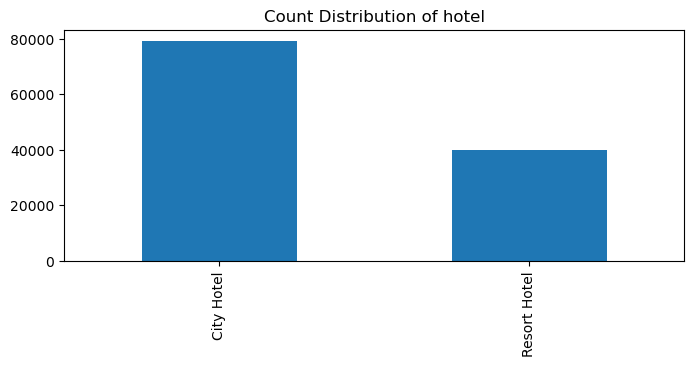

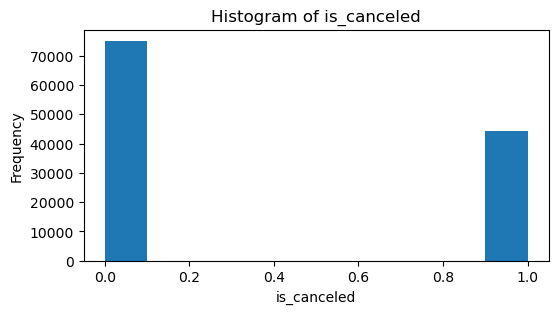

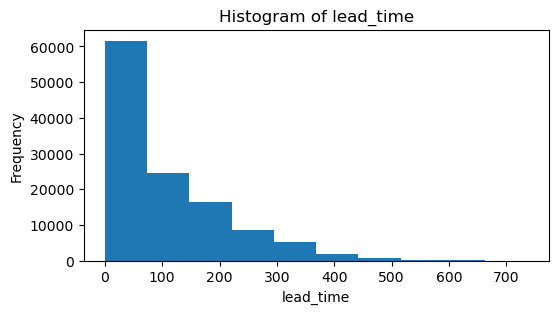

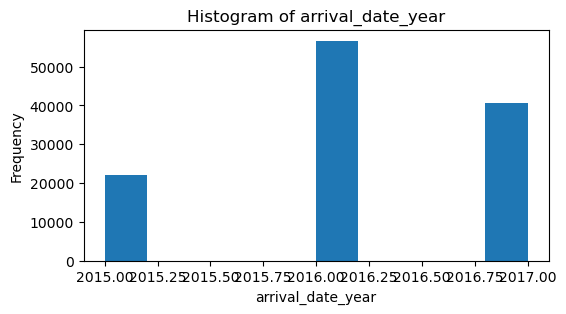

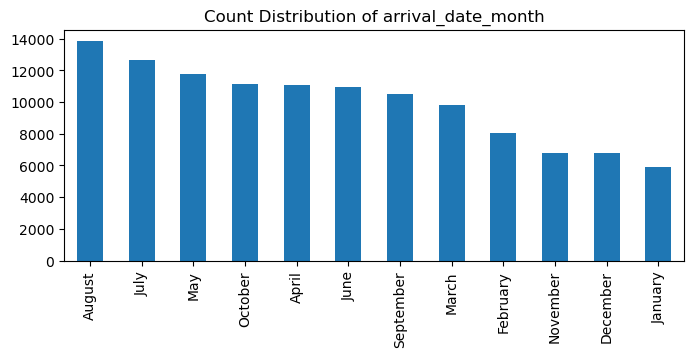

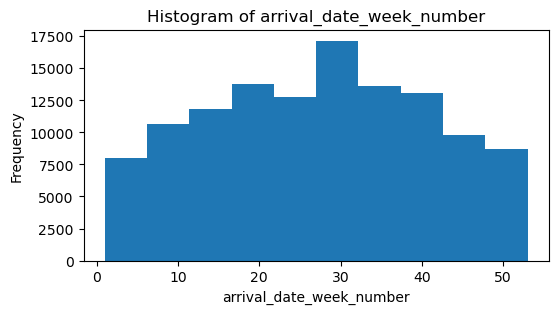

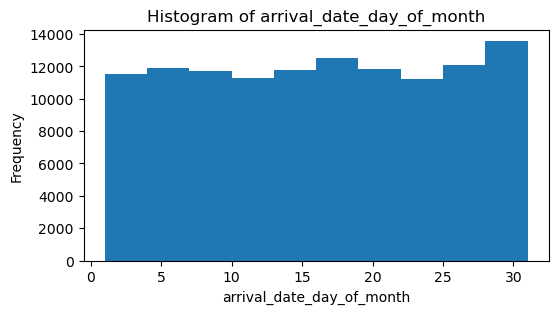

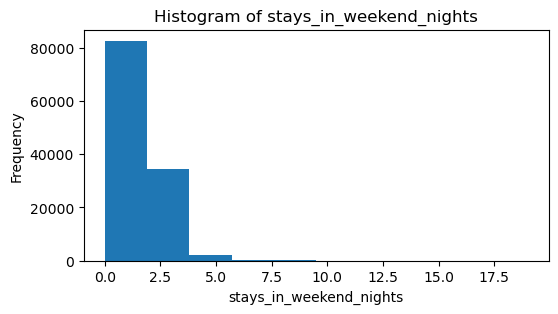

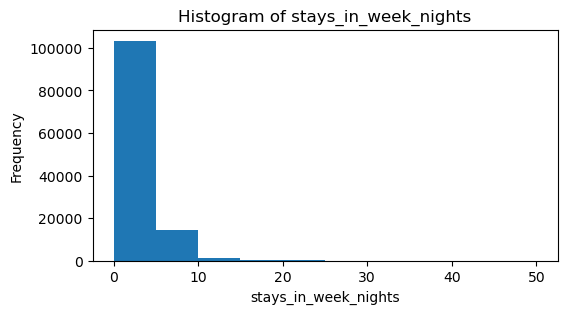

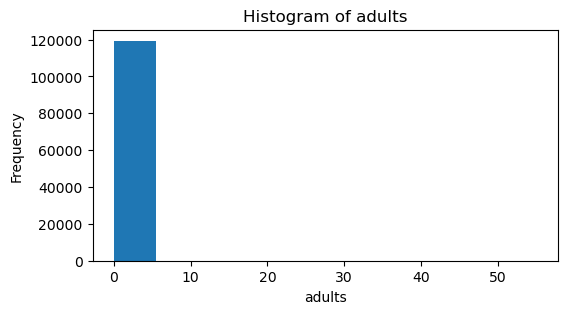

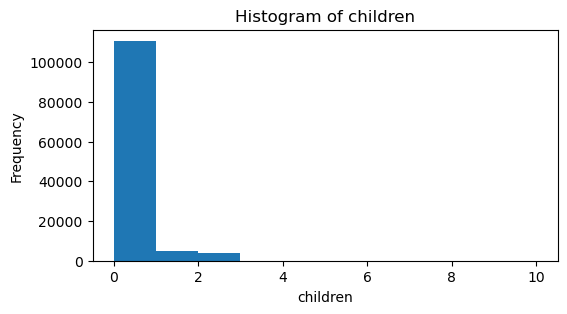

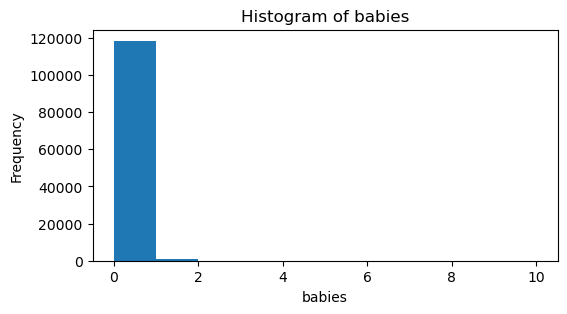

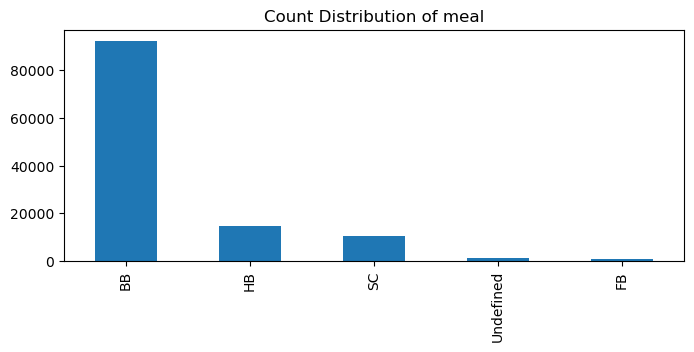

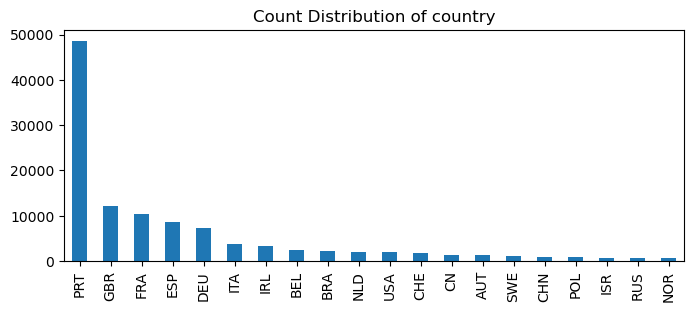

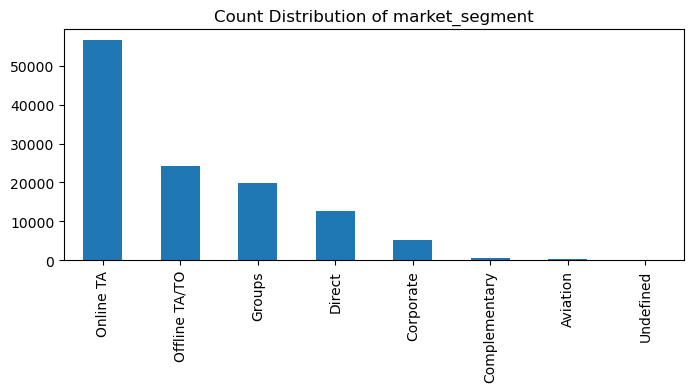

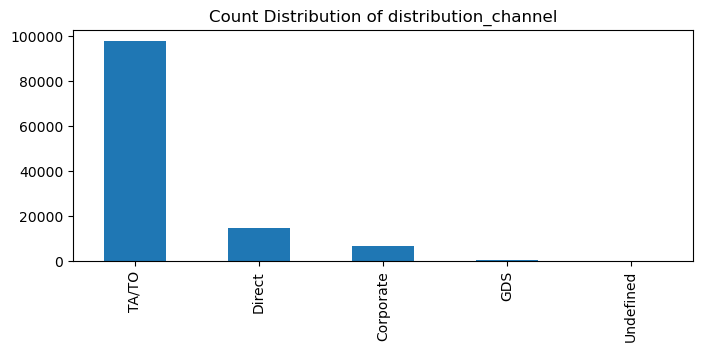

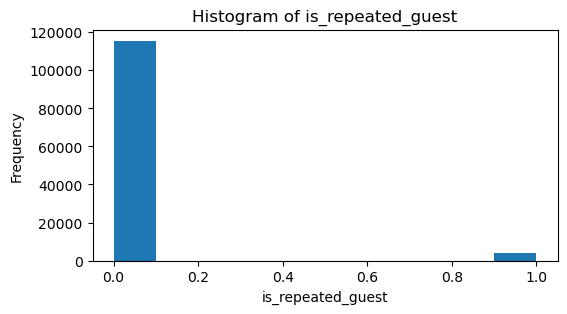

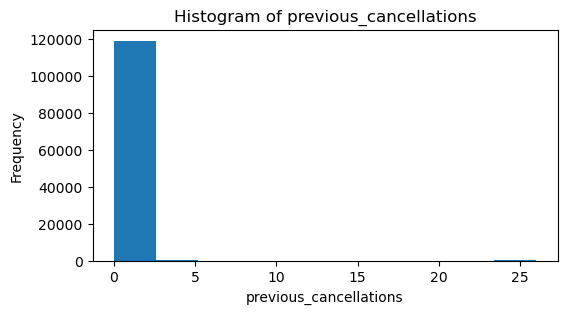

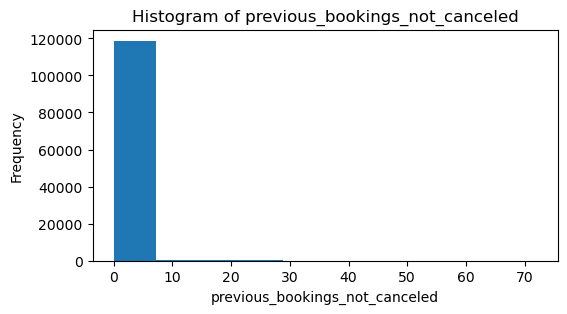

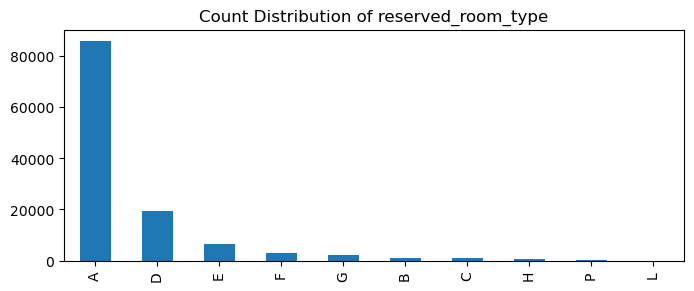

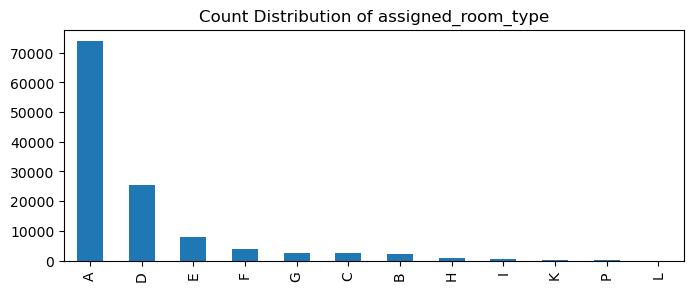

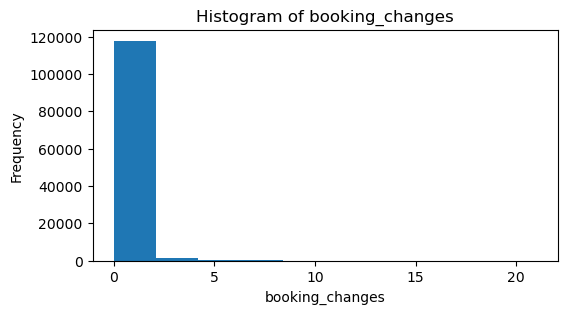

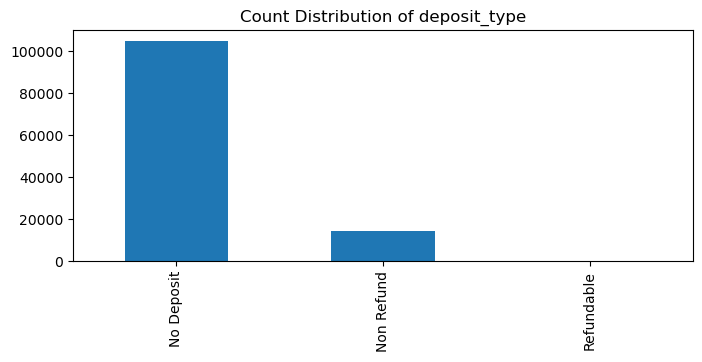

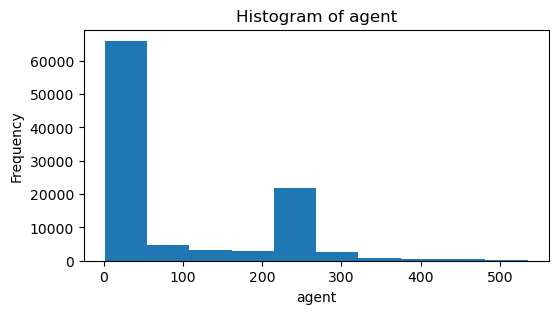

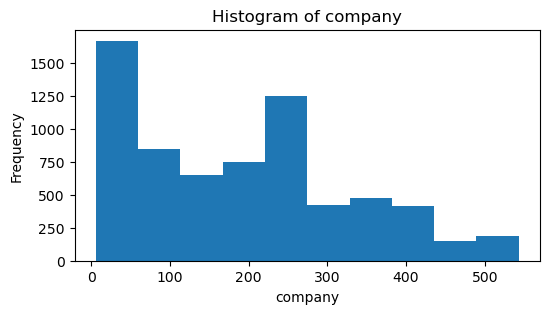

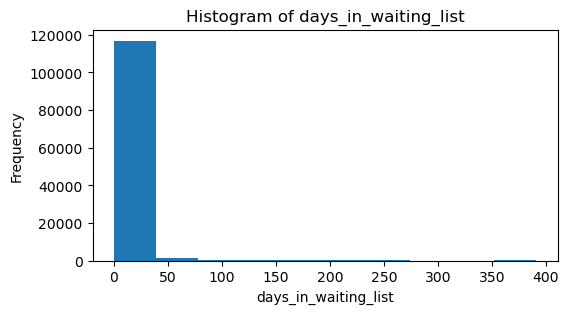

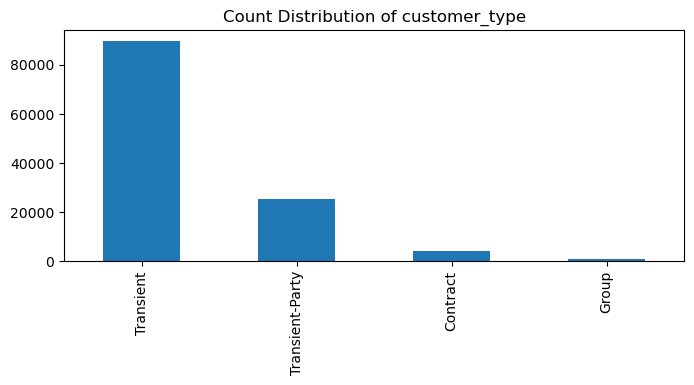

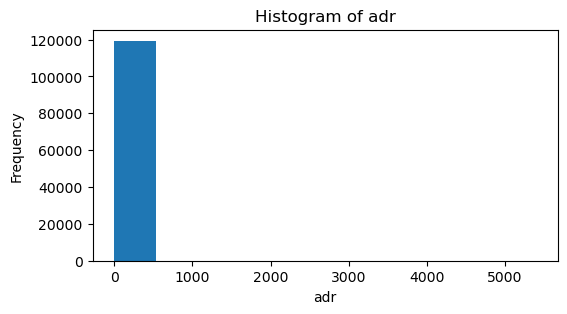

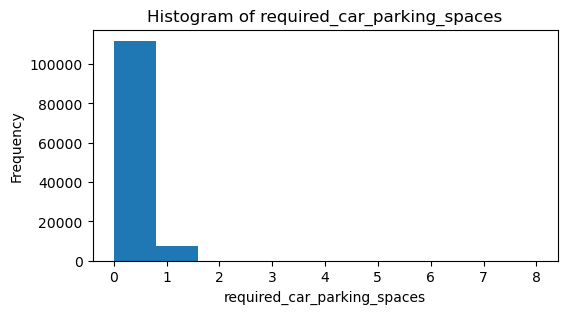

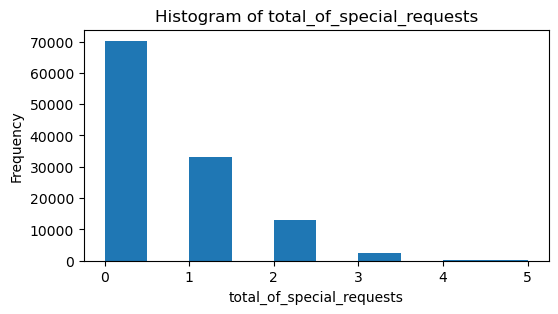

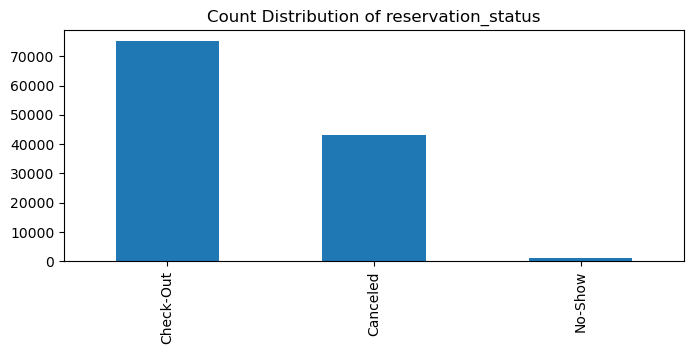

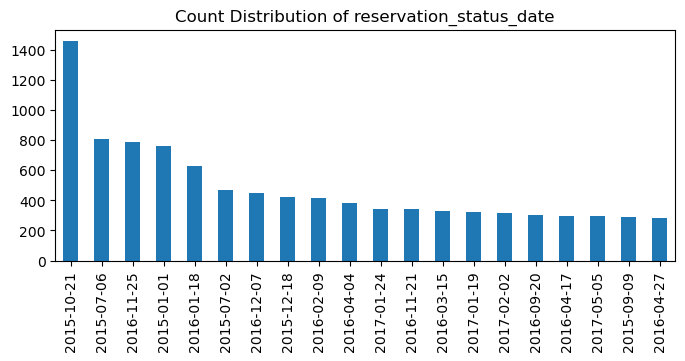

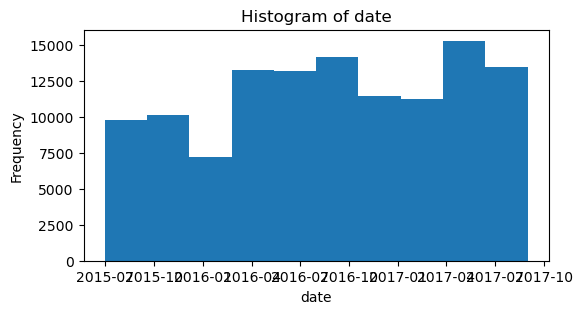

In [ ]:
import matplotlib as plt

#plot the histograms and count distribution for all the present attributes
for column_name, column_data_type in hotel_booking_source_df.dtypes.items():
    if column_data_type=='object' :
        plt.pyplot.figure(figsize=(6, 3))
        hotel_booking_source_df[column_name].value_counts()[:20].plot(kind='bar',
                                    figsize=(8,3),
                                    title="Count Distribution of "+column_name)
    else:
        plt.pyplot.figure(figsize=(6, 3))
        plt.pyplot.hist(hotel_booking_source_df[column_name])
        plt.pyplot.xlabel(column_name)
        plt.pyplot.ylabel('Frequency')
        plt.pyplot.title("Histogram of "+column_name)

In [ ]:
hotel_analysis_df = hotel_analysis_df[['hotel','date','market_segment','adr']]

hotel_analysis_df.head()

,hotel,date,market_segment,adr
0,Resort Hotel,2015-07-01,Direct,0.0
1,Resort Hotel,2015-07-01,Direct,0.0
2,Resort Hotel,2015-07-01,Direct,75.0
3,Resort Hotel,2015-07-01,Corporate,75.0
4,Resort Hotel,2015-07-01,Online TA,98.0


In [ ]:
city_df = hotel_analysis_df[hotel_analysis_df.hotel=='City Hotel'].iloc[:,1:].reset_index(drop=True)
resort_df = hotel_analysis_df[hotel_analysis_df.hotel=='Resort Hotel'].iloc[:,1:].reset_index(drop=True)

In [ ]:
city_df.head()

,date,market_segment,adr
0,2015-07-01,Offline TA/TO,0.00
1,2015-07-02,Groups,58.67
2,2015-07-03,Groups,86.00
3,2015-07-03,Groups,43.00
4,2015-07-03,Groups,86.00


In [ ]:
city_df["market_segment"].value_counts()

Online TA        24257
Offline TA/TO     9574
Direct            5037
Groups            4352
Corporate         2345
Complementary      478
Aviation           185
Name: market_segment, dtype: int64

In [ ]:
city_df['Segment'] = np.where(city_df['market_segment'] == 'Groups', 'Group', 'Transient')

city_df.head()

,date,market_segment,adr,Segment
0,2015-07-01,Offline TA/TO,0.00,Transient
1,2015-07-02,Groups,58.67,Group
2,2015-07-03,Groups,86.00,Group
3,2015-07-03,Groups,43.00,Group
4,2015-07-03,Groups,86.00,Group


In [ ]:
grouped_data = city_df.groupby('Segment')

total_transactions = grouped_data.size()

average_price = grouped_data['adr'].mean()

summary_df = pd.DataFrame({'Total Arrivals': total_transactions, 'ADR': average_price})

summary_df.head()

,Total Arrivals,ADR
Segment,,
Group,4352,84.343787
Transient,41876,107.970187


Group segment has a lower ADR than Transient.

Thus, implementing a capacity control model would be beneficial.

In [ ]:
city_arrivals =city_df.groupby(['date','Segment']).size().reset_index(name='num_arrivals')

city_arrivals.head()

,date,Segment,num_arrivals
0,2015-07-01,Transient,65
1,2015-07-02,Group,1
2,2015-07-03,Group,9
3,2015-07-03,Transient,1
4,2015-07-04,Group,9


In [ ]:
city_arrivals['month'] = city_arrivals['date'].dt.strftime('%B')
city_arrivals['day_of_week'] = city_arrivals['date'].dt.dayofweek
city_arrivals['weekday_weekend'] = city_arrivals['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [ ]:
monthly_segment_df = city_arrivals.groupby(['month', 'weekday_weekend','Segment'])['num_arrivals'].mean().reset_index()
monthly_segment_df.head()

,month,weekday_weekend,Segment,num_arrivals
0,April,Weekday,Group,16.642857
1,April,Weekday,Transient,64.317073
2,April,Weekend,Group,8.285714
3,April,Weekend,Transient,57.210526
4,August,Weekday,Group,17.600000


In [ ]:
month_order = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

monthly_segment_df['month'] = pd.Categorical(monthly_segment_df['month'], categories=month_order.keys(), ordered=True)
monthly_segment_df = monthly_segment_df.sort_values('month')

monthly_segment_df.head(12)

,month,weekday_weekend,Segment,num_arrivals
19,January,Weekend,Transient,28.210526
18,January,Weekend,Group,15.166667
17,January,Weekday,Transient,34.186047
16,January,Weekday,Group,12.076923
15,February,Weekend,Transient,55.687500
14,February,Weekend,Group,28.800000
13,February,Weekday,Transient,46.195122
12,February,Weekday,Group,16.875000
28,March,Weekday,Group,16.850000
31,March,Weekend,Transient,54.312500


In [ ]:
pivot_df = monthly_segment_df.pivot(index='month', columns=['weekday_weekend', 'Segment'], values='num_arrivals')
pivot_df = pivot_df.reorder_levels([1, 0], axis=1).sort_index(axis=1)

pivot_df.head()

Segment              Group             Transient           
weekday_weekend    Weekday    Weekend    Weekday    Weekend
month                                                      
January          12.076923  15.166667  34.186047  28.210526
February         16.875000  28.800000  46.195122  55.687500
March            16.850000   8.285714  61.043478  54.312500
April            16.642857   8.285714  64.317073  57.210526
May              19.650000  17.285714  67.733333  59.823529

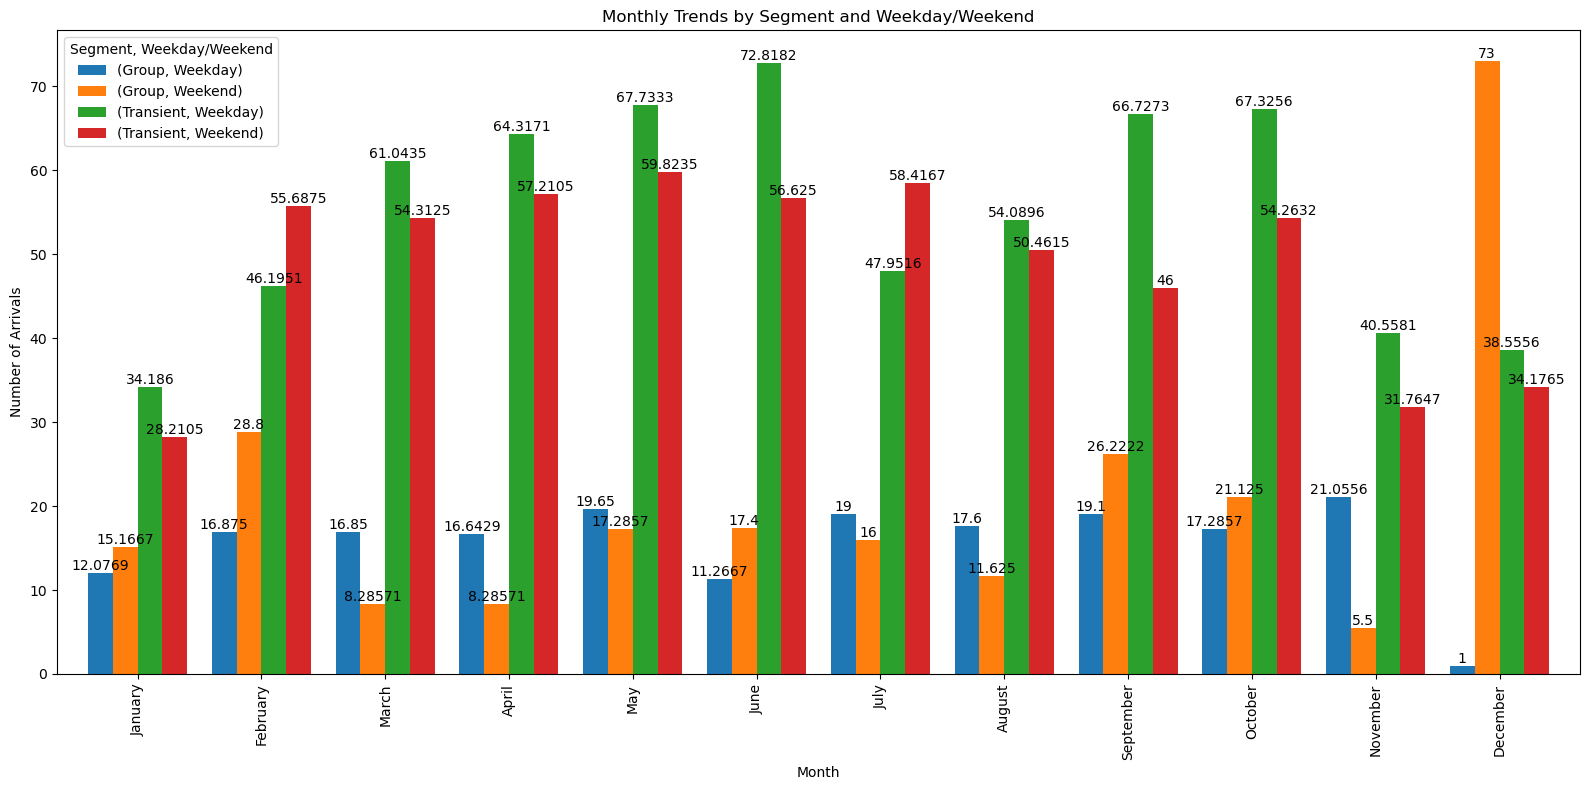

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))

pivot_df.plot(kind='bar', ax=ax, width =0.8)

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Number of Arrivals')
ax.set_title('Monthly Trends by Segment and Weekday/Weekend')

# Set legend
ax.legend(title='Segment, Weekday/Weekend')
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

Transient arrivals generally are stronger on the weekdays, except in February and July. We can also see that Transient arrivals peak in May - June and Sept - October, representing this hotel's peak demand period. On the contrary, the low season span from November to January.

Group arrivals do not have a clear Yearly seasonality. There seem to be some extreme values in December.

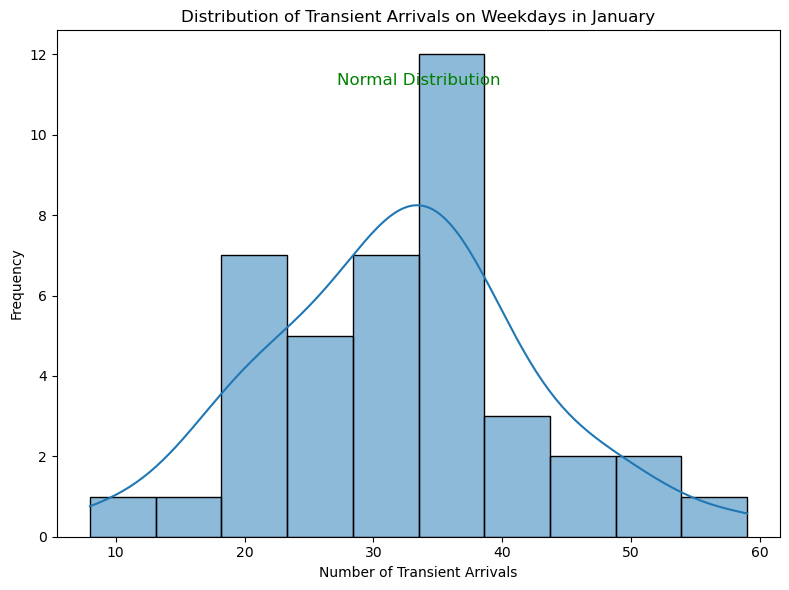

In [ ]:


df_transient_january = city_arrivals[(city_arrivals['Segment'] == 'Transient') & (city_arrivals['month'] == 'January') &(city_arrivals['weekday_weekend'] == 'Weekday')
                                     & (city_arrivals['num_arrivals']<70)]


statistic, p_value = shapiro(df_transient_january['num_arrivals'])


fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df_transient_january , x='num_arrivals', bins=10, kde=True, ax=ax)

# Set labels and title
ax.set_xlabel('Number of Transient Arrivals')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Transient Arrivals on Weekdays in January')


# Add text annotation for normality test result
if p_value > 0.05:
    ax.text(0.5, 0.9, 'Normal Distribution', transform=ax.transAxes, ha='center', va='center', fontsize=12, color='green')
else:
    ax.text(0.5, 0.9, 'Normal Distribution', transform=ax.transAxes, ha='center', va='center', fontsize=12, color='red')

plt.tight_layout()
plt.show()

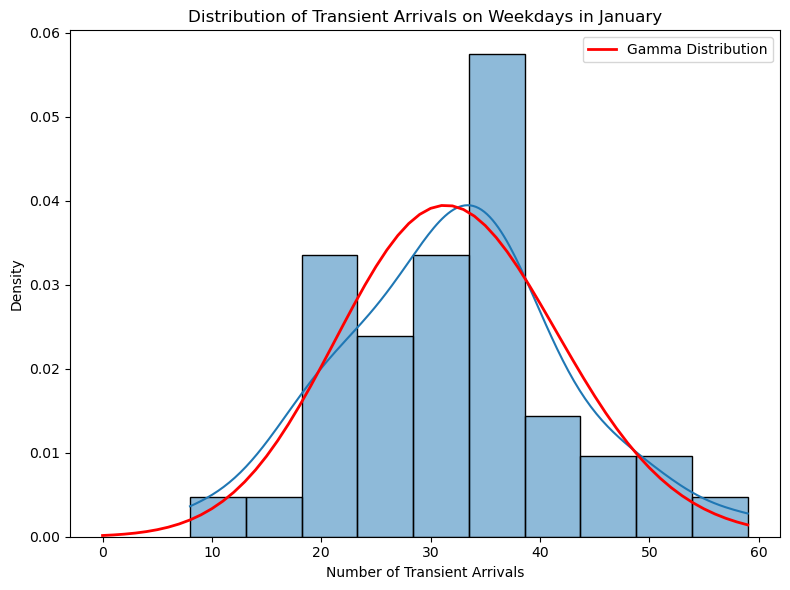

In [ ]:
# Fit gamma distribution to the data
shape, loc, scale = gamma.fit(df_transient_january['num_arrivals'])

# Generate values from the fitted gamma distribution
x = range(0, int(df_transient_january['num_arrivals'].max()) + 1)
y = gamma.pdf(x, shape, loc, scale)

# Plot the histogram and fitted gamma distribution
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df_transient_january, x='num_arrivals', bins=10, kde=True, ax=ax, stat='density')
ax.plot(x, y, 'r-', lw=2, label='Gamma Distribution')

# Set labels and title
ax.set_xlabel('Number of Transient Arrivals')
ax.set_ylabel('Density')
ax.set_title('Distribution of Transient Arrivals on Weekdays in January')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
df_transient_january

,date,Segment,num_arrivals,month,day_of_week,weekday_weekend
251,2016-01-01,Transient,23,January,4,Weekday
256,2016-01-04,Transient,32,January,0,Weekday
257,2016-01-05,Transient,19,January,1,Weekday
258,2016-01-06,Transient,27,January,2,Weekday
259,2016-01-07,Transient,21,January,3,Weekday
260,2016-01-08,Transient,29,January,4,Weekday
263,2016-01-11,Transient,8,January,0,Weekday
264,2016-01-12,Transient,20,January,1,Weekday
265,2016-01-13,Transient,14,January,2,Weekday
266,2016-01-14,Transient,46,January,3,Weekday


In [ ]:
# Get unique combinations of month, weekday_weekend
unique_combinations = city_arrivals[['month', 'weekday_weekend']].drop_duplicates()

# get transient data only
transient_df = city_arrivals[(city_arrivals['Segment'] == 'Transient')]

# Initialize empty dictionary to store gamma parameters
gamma_parameters = {}

# Iterate over unique combinations
for index, row in unique_combinations.iterrows():
    month = row['month']
    weekday_weekend = row['weekday_weekend']

    # Filter the dataframe for the specific combination
    filtered_df = transient_df[(transient_df['month'] == month) & (transient_df['weekday_weekend'] == weekday_weekend)]

    # Fit gamma distribution and obtain parameters
    shape, loc, scale = gamma.fit(filtered_df['num_arrivals'])

    # Store gamma parameters in dictionary
    gamma_parameters[(month, weekday_weekend)] = (shape, loc, scale)

# Print the gamma parameters for each combination
for combination, parameters in gamma_parameters.items():
    print(combination, ":", parameters)

('July', 'Weekday') : (340.04172049159274, -552.0568052201811, 1.763821098727528)
('July', 'Weekend') : (1099.4991203237685, -894.9280142493706, 0.8670602583106841)
('August', 'Weekend') : (495.8515936036315, -490.58347883650003, 1.0909526721823601)
('August', 'Weekday') : (411.63848062898774, -379.3013038782017, 1.0525742645343739)
('September', 'Weekday') : (29.06476888705344, -66.0485211702728, 4.568272872063844)
('September', 'Weekend') : (4.525302242501823, -6.062511793587406, 11.50475703580225)
('October', 'Weekday') : (4.626930525237684, 5.928401372951116, 13.269529541893935)
('October', 'Weekend') : (4.282770254813147, 0.14978921180961852, 12.635134769365767)
('November', 'Weekend') : (0.7909799132582722, 6.999999999999998, 27.93873442681083)
('November', 'Weekday') : (1.1558250899951625, 10.861833072317156, 25.692747236900463)
('December', 'Weekday') : (2.1288559839719703, 3.688939571416932, 16.378100396111293)
('December', 'Weekend') : (48.17579918068469, -82.71629805710359, 

In [ ]:
data = []
for (month, day_type), parameters in gamma_parameters.items():
    k, theta, scale = parameters  # Unpack the tuple
    data.append([month, day_type, k, theta, scale])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Month', 'Day Type', 'k', 'theta', 'scale'])

# Display the DataFrame
print(df)

        Month Day Type            k       theta      scale
0        July  Weekday   340.041720 -552.056805   1.763821
1        July  Weekend  1099.499120 -894.928014   0.867060
2      August  Weekend   495.851594 -490.583479   1.090953
3      August  Weekday   411.638481 -379.301304   1.052574
4   September  Weekday    29.064769  -66.048521   4.568273
5   September  Weekend     4.525302   -6.062512  11.504757
6     October  Weekday     4.626931    5.928401  13.269530
7     October  Weekend     4.282770    0.149789  12.635135
8    November  Weekend     0.790980    7.000000  27.938734
9    November  Weekday     1.155825   10.861833  25.692747
10   December  Weekday     2.128856    3.688940  16.378100
11   December  Weekend    48.175799  -82.716298   2.424565
12    January  Weekday     7.571638   -2.521539   4.848038
13    January  Weekend     2.340594   13.474148   6.296006
14   February  Weekday     3.733185    9.762075   9.759240
15   February  Weekend     0.964218   34.000000  22.5030

In [ ]:
df

,Month,Day Type,k,theta,scale
0,July,Weekday,340.041720,-552.056805,1.763821
1,July,Weekend,1099.499120,-894.928014,0.867060
2,August,Weekend,495.851594,-490.583479,1.090953
3,August,Weekday,411.638481,-379.301304,1.052574
4,September,Weekday,29.064769,-66.048521,4.568273
5,September,Weekend,4.525302,-6.062512,11.504757
6,October,Weekday,4.626931,5.928401,13.269530
7,October,Weekend,4.282770,0.149789,12.635135
8,November,Weekend,0.790980,7.000000,27.938734
9,November,Weekday,1.155825,10.861833,25.692747


In [ ]:
shape, loc, scale = gamma_parameters[('January', 'Weekday')]
survivor_prob = gamma.sf(20, shape, loc, scale)

# Print the survivor probability
print("Probability of more than 20 arrivals:", survivor_prob)

Probability of more than 20 arrivals: 0.868055095836751


ER = (Outcome Revenue * Probability)

let's implement the formula and calculate the number of rooms to set aside for transient in Janruay weekdays.

In [ ]:
jan_arr = range(0, int(df_transient_january['num_arrivals'].max()) + 1)

In [ ]:
results = []

# Iterate over each arrival value
for arrival in jan_arr:
    # Calculate the survivor probability using the gamma parameters
    survivor_prob = 1 - gamma.cdf(arrival, shape, loc, scale)

    # Append the arrival value and survivor probability to the results list
    results.append((arrival, survivor_prob))

# Create a DataFrame from the results list
result_df = pd.DataFrame(results, columns=['Arrival', 'Survivor Probability'])

result_df["expeted_Rev"] = (107* result_df["Arrival"]) * result_df["Survivor Probability"]

<Axes: >

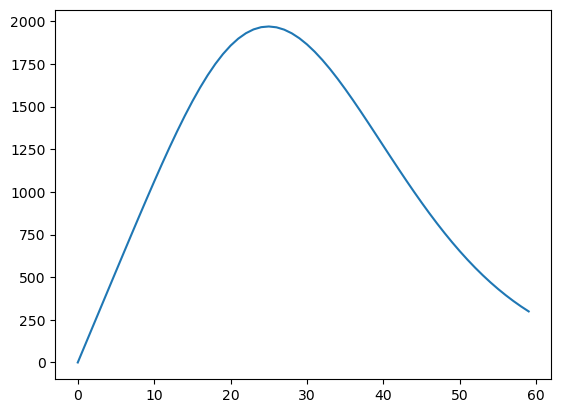

In [ ]:
result_df['expeted_Rev'].plot()

In [ ]:
result_df['expected_marginal_rev'] = result_df['Survivor Probability'] *107

result_df.head(30)

,Arrival,Survivor Probability,expeted_Rev,expected_marginal_rev
0,0,1.000000,0.000000,106.999971
1,1,0.999997,106.999692,106.999692
2,2,0.999984,213.996585,106.998292
3,3,0.999939,320.980569,106.993523
4,4,0.999822,427.923622,106.980905
5,5,0.999560,534.764811,106.952962
6,6,0.999053,641.392226,106.898704
7,7,0.998163,747.624402,106.803486
8,8,0.996722,853.194060,106.649257
9,9,0.994534,957.736673,106.415186


In [ ]:
probability = 84/107

# Calculate the number of arrivals corresponding to the given probability
num_arrivals = gamma.isf(probability, shape,loc, scale)
num_arrivals

23.30300828854896

In [ ]:
city_ADR = city_df.groupby(['date', 'Segment']).agg({'Segment': 'count', 'adr': 'sum'})
city_ADR.columns = ['Arrivals', 'Revenue']
city_ADR = city_ADR.reset_index()
city_ADR.head()

,date,Segment,Arrivals,Revenue
0,2015-07-01,Transient,65,6180.00
1,2015-07-02,Group,1,58.67
2,2015-07-03,Group,9,685.00
3,2015-07-03,Transient,1,60.27
4,2015-07-04,Group,9,574.00


In [ ]:
city_ADR['month'] = city_ADR['date'].dt.strftime('%B')
city_ADR['day_of_week'] = city_ADR['date'].dt.dayofweek
city_ADR['weekday_weekend'] = city_ADR['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [ ]:
city_ADR = city_ADR.groupby(['month','weekday_weekend', 'Segment']).agg({'Arrivals': 'sum', 'Revenue': 'sum'})


In [ ]:
city_ADR['ADR'] = city_ADR['Revenue']/city_ADR['Arrivals']
city_ADR

Arrivals    Revenue         ADR
month     weekday_weekend Segment                                   
April     Weekday         Group           233   21577.58   92.607639
                          Transient      2637  298206.69  113.085586
          Weekend         Group            58    5836.41  100.627759
                          Transient      1087  123484.47  113.601168
August    Weekday         Group           352   27923.75   79.328835
                          Transient      3624  438988.09  121.133579
          Weekend         Group            93    7463.17   80.249140
                          Transient      1312  162800.41  124.085678
December  Weekday         Group             3     292.90   97.633333
                          Transient      1735  151778.21   87.480236
          Weekend         Group            73    4912.00   67.287671
                          Transient       581   53170.27   91.515095
February  Weekday         Group           135    9846.33   72.935778
                          Transient      1894  165855.16   87.568722
          Weekend         Group           144    9941.00   69.034722
                          Transient       891   78422.30   88.016049
January   Weekday         Group           157   11344.00   72.254777
                          Transient      1470  121284.34   82.506354
          Weekend         Group            91    6836.25   75.123626
                          Transient       536   45725.48   85.308731
July      Weekday         Group           247   20476.30   82.900000
                          Transient      2973  352077.76  118.425079
          Weekend         Group           160   12272.80   76.705000
                          Transient      1402  167799.28  119.685649
June      Weekday         Group           169   14768.13   87.385385
                          Transient      3204  380414.00  118.730961
          Weekend         Group            87    7306.49   83.982644
                          Transient       906  111398.64  122.956556
March     Weekday         Group           337   30121.49   89.381276
                          Transient      2808  252382.57   89.879833
          Weekend         Group            58    4720.98   81.396207
                          Transient       869   79950.14   92.002463
May       Weekday         Group           393   39520.53  100.561145
                          Transient      3048  373313.10  122.478051
          Weekend         Group           121   11015.86   91.040165
                          Transient      1017  127672.02  125.537876
November  Weekday         Group           379   26559.14   70.076887
                          Transient      1744  156923.52   89.979083
          Weekend         Group            33    2366.67   71.717273
                          Transient       540   47355.90   87.696111
October   Weekday         Group           242   21247.72   87.800496
                          Transient      2895  301377.15  104.102642
          Weekend         Group           169   12702.59   75.163254
                          Transient      1031  105944.75  102.759214
September Weekday         Group           382   36323.67   95.088141
                          Transient      2936  338336.86  115.237350
          Weekend         Group           236   21688.40   91.900000
                          Transient       736   86698.43  117.796780

In [ ]:
ratio_df = pd.pivot_table(city_ADR, values='ADR', index=['month', 'weekday_weekend'], columns='Segment', aggfunc='sum', fill_value=0)

ratio_df['Probability'] = ratio_df['Group'] / ratio_df['Transient']

ratio_df.head()

Segment                        Group   Transient  Probability
month    weekday_weekend                                     
April    Weekday           92.607639  113.085586     0.818916
         Weekend          100.627759  113.601168     0.885799
August   Weekday           79.328835  121.133579     0.654887
         Weekend           80.249140  124.085678     0.646724
December Weekday           97.633333   87.480236     1.116062

In [ ]:
gamma_df = pd.DataFrame.from_dict(gamma_parameters, orient='index', columns=['shape', 'loc', 'scale'])


gamma_df['index'] = gamma_df.index

# Unpack the 'index' column into separate columns 'month' and 'weekday_weekend'
gamma_df[['month', 'weekday_weekend']] = gamma_df['index'].apply(lambda x: pd.Series(x))

# Drop the 'index' column
gamma_df.drop('index', axis=1, inplace=True)

gamma_df.reset_index(inplace=True,drop=True)

In [ ]:
merged_df = gamma_df.merge(ratio_df, on=['month', 'weekday_weekend'])

merged_df = merged_df[['month', 'weekday_weekend'] + [col for col in merged_df.columns if col not in ['month', 'weekday_weekend']]]

In [ ]:
merged_df['month'] = pd.Categorical(merged_df['month'], categories=month_order.keys(), ordered=True)
merged_df = merged_df.sort_values('month').reset_index(drop= True)

In [ ]:
merged_df['Transient_protection'] = gamma.isf(merged_df["Probability"], merged_df['shape'],merged_df['loc'],merged_df['scale'])

In [ ]:
merged_df.head()

,month,weekday_weekend,shape,loc,scale,Group,Transient,Probability,Transient_protection
0,January,Weekend,2.340594,13.474148,6.296006,75.123626,85.308731,0.880609,18.430621
1,January,Weekday,7.571638,-2.521539,4.848038,72.254777,82.506354,0.875748,19.649125
2,February,Weekend,0.964218,34.000000,22.503081,69.034722,88.016049,0.784342,39.050370
3,February,Weekday,3.733185,9.762075,9.759240,72.935778,87.568722,0.832898,28.616672
4,March,Weekend,2.183834,31.592258,10.403842,81.396207,92.002463,0.884718,38.688425


In [ ]:
transient_protection = merged_df[['month','weekday_weekend','Group','Transient','Transient_protection']]
transient_protection['Transient_protection'] = transient_protection['Transient_protection'].fillna(0)

transient_protection[['Group', 'Transient', 'Transient_protection']] = transient_protection[['Group', 'Transient', 'Transient_protection']].round(0).astype(int)

C:\Users\Pal\AppData\Local\Temp\ipykernel_9924\2981390268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transient_protection['Transient_protection'] = transient_protection['Transient_protection'].fillna(0)
C:\Users\Pal\AppData\Local\Temp\ipykernel_9924\2981390268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transient_protection[['Group', 'Transient', 'Transient_protection']] = transient_protection[['Group', 'Transient', 'Transient_protection']].round(0).astype(int)


In [ ]:
transient_protection.rename(columns={'Group': 'Group_ADR','Transient':'Transient_ADR'},inplace=True)

C:\Users\Pal\AppData\Local\Temp\ipykernel_9924\1302992596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transient_protection.rename(columns={'Group': 'Group_ADR','Transient':'Transient_ADR'},inplace=True)


In [ ]:
transient_protection.head()

,month,weekday_weekend,Group_ADR,Transient_ADR,Transient_protection
0,January,Weekend,75,85,18
1,January,Weekday,72,83,20
2,February,Weekend,69,88,39
3,February,Weekday,73,88,29
4,March,Weekend,81,92,39


In [ ]:
transient_protection

,month,weekday_weekend,Group_ADR,Transient_ADR,Transient_protection
0,January,Weekend,75,85,18
1,January,Weekday,72,83,20
2,February,Weekend,69,88,39
3,February,Weekday,73,88,29
4,March,Weekend,81,92,39
5,March,Weekday,89,90,33
6,April,Weekend,101,114,43
7,April,Weekday,93,113,50
8,May,Weekday,101,122,52
9,May,Weekend,91,126,49


In [ ]:

data = {
    'month': ['January', 'January', 'February', 'February', 'March', 'March', 'April', 'April', 'May', 'May', 'June', 'June', 'July', 'July', 'August', 'August', 'September', 'September', 'October', 'October', 'November', 'November', 'December', 'December'],
    'weekday_weekend': ['Weekend', 'Weekday', 'Weekend', 'Weekday', 'Weekend', 'Weekday', 'Weekend', 'Weekday', 'Weekday', 'Weekend', 'Weekend', 'Weekday', 'Weekday', 'Weekend', 'Weekday', 'Weekend', 'Weekend', 'Weekday', 'Weekend', 'Weekday', 'Weekday', 'Weekend', 'Weekday', 'Weekend'],
    'shape': [2.340594, 7.571638, 0.964218, 3.733185, 2.183834, 27.102337, 58.430750, 9.436899, 29.799804, 1020.863569, 14.254106, 2.732026, 338.281483, 1099.499120, 411.638481, 495.851594, 4.525302, 29.064769, 4.282770, 4.626931, 1.155825, 0.790980, 2.128856, 48.175799],
    'loc': [13.474148, -2.521539, 34.000000, 9.762075, 31.592258, -4.995336, -31.750422, 15.213384, -25.462713, -491.722139, -51.359781, 33.345916, -551.781771, -894.928014, -379.301304, -490.583479, -6.062512, -66.048521, 0.149789, 5.928401, 10.861833, 7.000000, 3.688940, -82.716298],
    'scale': [6.296006, 4.848038, 22.503081, 9.759240, 10.403842, 2.434362, 1.522300, 5.203372, 3.127405, 0.540247, 7.575696, 14.447985, 1.772311, 0.867060, 1.052574, 1.090953, 11.504757, 4.568273, 12.635135, 13.269530, 25.692747, 27.938734, 16.378100, 2.424565]
}
df = pd.DataFrame(data)

probabilities = np.linspace(0.01, 0.99, 100)

plt.figure(figsize=(15, 8))

for index, row in df.iterrows():
    label = f"{row['month']} {row['weekday_weekend']}"
    room_thresholds = gamma.ppf(1 - probabilities, row['shape'], row['loc'], row['scale'])
    plt.plot(probabilities, room_thresholds, label=label)

plt.title('Inverse Survivor Function for Each Month and Day Type')
plt.xlabel('Probability')
plt.ylabel('Number of Rooms')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

data = {
    'month': ['January', 'January', 'February', 'February', 'March', 'March', 'April', 'April', 'May', 'May', 'June', 'June', 'July', 'July', 'August', 'August', 'September', 'September', 'October', 'October', 'November', 'November', 'December', 'December'],
    'weekday_weekend': ['Weekend', 'Weekday', 'Weekend', 'Weekday', 'Weekend', 'Weekday', 'Weekend', 'Weekday', 'Weekday', 'Weekend', 'Weekend', 'Weekday', 'Weekday', 'Weekend', 'Weekday', 'Weekend', 'Weekend', 'Weekday', 'Weekend', 'Weekday', 'Weekday', 'Weekend', 'Weekday', 'Weekend'],
    'shape': [2.340594, 7.571638, 0.964218, 3.733185, 2.183834, 27.102337, 58.430750, 9.436899, 29.799804, 1020.863569, 14.254106, 2.732026, 338.281483, 1099.499120, 411.638481, 495.851594, 4.525302, 29.064769, 4.282770, 4.626931, 1.155825, 0.790980, 2.128856, 48.175799],
    'loc': [13.474148, -2.521539, 34.000000, 9.762075, 31.592258, -4.995336, -31.750422, 15.213384, -25.462713, -491.722139, -51.359781, 33.345916, -551.781771, -894.928014, -379.301304, -490.583479, -6.062512, -66.048521, 0.149789, 5.928401, 10.861833, 7.000000, 3.688940, -82.716298],
    'scale': [6.296006, 4.848038, 22.503081, 9.759240, 10.403842, 2.434362, 1.522300, 5.203372, 3.127405, 0.540247, 7.575696, 14.447985, 1.772311, 0.867060, 1.052574, 1.090953, 11.504757, 4.568273, 12.635135, 13.269530, 25.692747, 27.938734, 16.378100, 2.424565]
}
df = pd.DataFrame(data)

revenue_per_room = 100

profit_results = []

for index, row in df.iterrows():
    shape, loc, scale = row['shape'], row['loc'], row['scale']
    month_weekday = f"{row['month']} {row['weekday_weekend']}"

    room_numbers = np.arange(0, 100)

    probabilities = gamma.cdf(room_numbers, shape, loc, scale)
    probabilities = np.diff(np.append([0], probabilities))

    expected_profit = np.sum(probabilities * room_numbers * revenue_per_room)

    profit_results.append({
        'Month/Weekday': month_weekday,
        'Expected Profit': expected_profit
    })

profit_df = pd.DataFrame(profit_results)
print(profit_df)
